<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/UAS/Chapter%203/Classification_With_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Dataset MNIST

In [1]:
# Load MNIST dataset dari OpenML
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype('int')  # Konversi label ke integer


Train split test

In [2]:
# Bagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42
)

Klasifikasi Biner untuk mendeteksi angka 5

In [3]:
# Buat label biner: True jika angka 5, False jika bukan
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Train SGDClassifier

In [4]:
from sklearn.linear_model import SGDClassifier

# Melatih model klasifikasi biner menggunakan Stochastic Gradient Descent
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Prediksi 1 sampel

In [5]:
# Prediksi apakah sampel pertama dari test set adalah angka 5
sgd_clf.predict([X_test[0]])

array([False])

Evaluasi

In [6]:
from sklearn.model_selection import cross_val_score

# Evaluasi akurasi dengan 3-fold cross-validation
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.9629 , 0.96775, 0.96435])

In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Prediksi dengan cross_val_predict untuk membuat confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# Tampilkan confusion matrix
confusion_matrix(y_train_5, y_train_pred)


array([[54103,   521],
       [ 1579,  3797]])

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Hitung precision, recall, dan F1 score
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
f1 = f1_score(y_train_5, y_train_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8793422880963409
Recall: 0.7062872023809523
F1 Score: 0.783371157416959


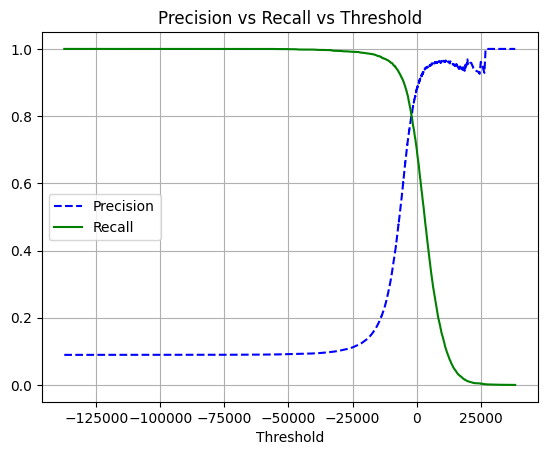

In [9]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Dapatkan skor prediksi (decision function)
y_scores = cross_val_predict(
    sgd_clf, X_train, y_train_5, cv=3, method="decision_function"
)

# Hitung precision, recall, dan threshold
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Plot kurva Precision-Recall terhadap threshold
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)
plt.title("Precision vs Recall vs Threshold")
plt.show()